In [ ]:
!pip install typing-extensions<4.6.0

!pip install ydata-profiling

/bin/bash: line 1: 4.6.0: No such file or directory


In [15]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv("red_wine.csv")

In [18]:
profile = ProfileReport(df, title="Profiling Report")





In [19]:
profile.to_file("my_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('red_wine.csv')

# Split the data into features and target
X = data.drop(columns=['type'])  # Replace 'target_column' with the actual target column name
print(X)
y = data['type']


# Create a dictionary to store performance metrics for each model
results = {}

# Baseline Model (Dummy Classifier)
dummy = DummyClassifier(strategy='most_frequent')
baseline_scores = cross_val_score(dummy, X, y, cv=10, scoring='accuracy')

print(baseline_scores)
results['Baseline'] = baseline_scores.mean()

# Logistic Regression
lr = LogisticRegression()
lr_scores = cross_val_score(lr, X, y, cv=10, scoring='accuracy')
print(lr_scores)
results['Logistic Regression'] = lr_scores.mean()

# Naive Bayes
nb = GaussianNB()
nb_scores = cross_val_score(nb, X, y, cv=10, scoring='accuracy')
print(nb_scores)
results['Naive Bayes'] = nb_scores.mean()

# Decision Tree
dt = DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
print(dt_scores)
results['Decision Tree'] = dt_scores.mean()

# Support Vector Machine
svm = SVC()
svm_scores = cross_val_score(svm, X, y, cv=10, scoring='accuracy')
results['SVM'] = svm_scores.mean()

# Random Forest
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
results['Random Forest'] = rf_scores.mean()

# Print the results
for model, score in results.items():
    print(f"{model}: {score:.2f}")


     citric acid  sulphates  alcohol
0           0.49       0.63      8.0
1           0.66       0.57      8.3
2           0.23       0.44      8.5
3           0.44       0.84      8.6
4           0.08       0.50      8.7
..           ...        ...      ...
566         0.40       0.70     12.7
567         0.28       0.60     12.8
568         0.31       0.60     12.8
569         0.34       0.72     12.8
570         0.35       0.32     12.8

[571 rows x 3 columns]
[0.53448276 0.52631579 0.52631579 0.52631579 0.52631579 0.52631579
 0.52631579 0.52631579 0.52631579 0.54385965]
[0.67241379 0.8245614  0.77192982 0.80701754 0.8245614  0.77192982
 0.80701754 0.8245614  0.80701754 0.73684211]
[0.67241379 0.77192982 0.78947368 0.84210526 0.85964912 0.85964912
 0.84210526 0.92982456 0.8245614  0.8245614 ]
[0.63793103 0.66666667 0.56140351 0.63157895 0.78947368 0.89473684
 0.80701754 0.80701754 0.77192982 0.80701754]
Baseline: 0.53
Logistic Regression: 0.78
Naive Bayes: 0.82
Decision Tree: 0.74
S

In [36]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.dummy import DummyClassifier

# Load the dataset
data = pd.read_csv("red_wine.csv")
X = data.drop("type", axis=1)  # Replace with the actual column name
y = data["type"]  # Replace with the actual column name
y_binary = (y == 'high').astype(int)
y = y_binary

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": SVC(kernel='linear'),
    "SVM-RBF": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(),
}

# Baseline model
dummy_classifier = DummyClassifier(strategy="most_frequent")
baseline_acc_scores = cross_val_score(dummy_classifier, X, y, cv=KFold(n_splits=10, shuffle=True), scoring="accuracy")
baseline_auc_scores = cross_val_score(dummy_classifier, X, y, cv=KFold(n_splits=10, shuffle=True), scoring="roc_auc")

# Evaluate each model
results = {"Model": [], "Accuracy": [], "AUC": []}
for model_name, model in models.items():
    acc_scores = cross_val_score(model, X, y, cv=KFold(n_splits=10, shuffle=True), scoring="accuracy")
    auc_scores = cross_val_score(model, X, y, cv=KFold(n_splits=10, shuffle=True), scoring="roc_auc")

    results["Model"].append(model_name)
    results["Accuracy"].append(acc_scores.mean())
    results["AUC"].append(auc_scores.mean())

# Add the baseline scores
results["Model"].append("Baseline")
results["Accuracy"].append(baseline_acc_scores.mean())
results["AUC"].append(baseline_auc_scores.mean())

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Print the results
print(results_df)


                 Model  Accuracy       AUC
0  Logistic Regression  0.782970  0.874195
1          Naive Bayes  0.826649  0.883012
2        Decision Tree  0.812704  0.820023
3           SVM-Linear  0.793315  0.874946
4              SVM-RBF  0.537568  0.854555
5        Random Forest  0.847641  0.923150
6             Baseline  0.528887  0.500000


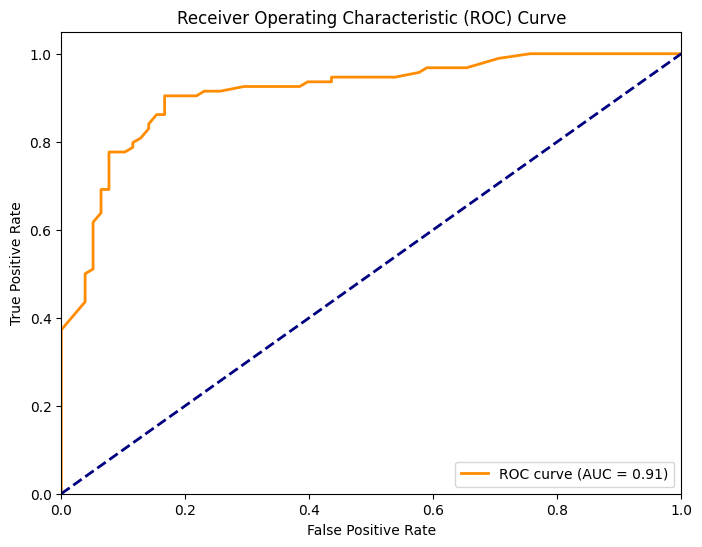

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("red_wine.csv")
X = data.drop("type", axis=1)  # Replace with the actual column name
y = data["type"]  # Replace with the actual column name
y_binary = (y == 'high').astype(int)

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Fit a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class (class 1)
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

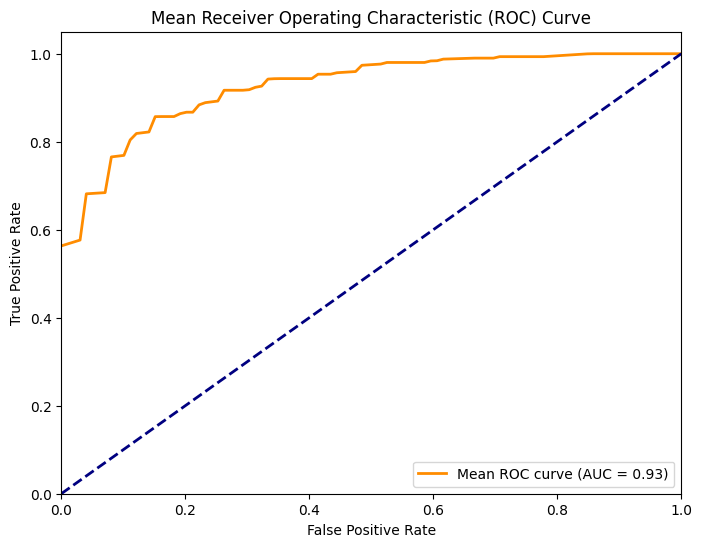

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("red_wine.csv")
X = data.drop("type", axis=1)  # Replace with the actual column name
y = data["type"]  # Replace with the actual column name

# Convert 'high' and 'low' to binary format (e.g., 0 and 1)
y_binary = (y == 'high').astype(int)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Create a StratifiedKFold object for 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize empty arrays to store FPR and TPR
all_fpr = []
all_tpr = []

# Perform 10-fold cross-validation
for train_idx, test_idx in cv.split(X, y_binary):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_binary.iloc[train_idx], y_binary.iloc[test_idx]

    rf_classifier.fit(X_train, y_train)
    y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    all_fpr.append(fpr)
    all_tpr.append(tpr)

# Create an array of common FPR values
mean_fpr = np.linspace(0, 1, 100)

# Interpolate TPR values for each fold to match the common FPR values
interp_tpr = np.zeros_like(mean_fpr)
for i in range(len(all_fpr)):
    interp_tpr += np.interp(mean_fpr, all_fpr[i], all_tpr[i])

# Calculate the mean TPR and AUC
mean_tpr = interp_tpr / len(all_fpr)
roc_auc = auc(mean_fpr, mean_tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label=f'Mean ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Load the red-wine dataset and train the Random Forest model
red_wine_data = pd.read_csv("red_wine.csv")
X_train = red_wine_data.drop("type", axis=1)  # Replace with the actual column name
y_train = red_wine_data["type"]  # Replace with the actual column name

# Convert 'high' and 'low' to binary format (e.g., 0 and 1)
y_train_binary = (y_train == 'high').astype(int)

# Create and train the Random Forest model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train_binary)

# Load the white-wine dataset and test the model
white_wine_data = pd.read_csv("white_wine.csv")
X_test = white_wine_data.drop("type", axis=1)  # Replace with the actual column name
y_test = white_wine_data["type"]  # Replace with the actual column name

# Convert 'high' and 'low' to binary format (e.g., 0 and 1)
y_test_binary = (y_test == 'high').astype(int)

# Predict probabilities for the positive class (class 1)
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test_binary, y_pred_prob)

# Report the AUC score
print("AUC Score on white-wine dataset:", auc_score)


AUC Score on white-wine dataset: 0.9691417550626807
